In [4]:

import pandas as pd
import os

df = pd.read_csv(os.path.join('data', 'workout', 'Workout_Data1.csv'))
df.head(5)

,Unnamed: 0,Exercise Plan,ExerciseType,Difficulty,Total Plan Duration (minutes),Calories Burned (Plan),Target Muscle Group,Gender,Height (cm),Age,Weight (kg),BMI,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
0,0,"Plank, Lunges, Russian Twists, Burpees, Sit-up...",Strength,Beginner,35,544.0,"Core (Abdominals, Lower Back), Quadriceps, Ham...",Female,157,24,56,22.857097,0,1,0,0,0
1,1,"Plank, Dumbbell Rows, Jumping Jacks, Lunges, B...",Cardio,Beginner,50,544.0,"Core (Abdominals, Lower Back), Back, Biceps, F...",Male,193,50,99,26.632088,0,1,0,0,0
2,2,"Squats, Sit-ups, Calf Raises, Bicep Curls, Leg...",Flexibility,Advanced,70,744.0,"Quadriceps, Hamstrings, Glutes, Core, Calves, ...",Male,199,45,117,29.749211,0,1,1,0,0
3,3,"Deadlifts, Bicep Curls, Box Jumps, Plank Jacks...",Cardio,Advanced,60,900.0,"Back, Glutes, Hamstrings, Biceps, Forearms, Le...",Male,150,49,43,19.528223,0,1,1,0,0
4,4,"Lateral Raises, Calf Raises, Push-ups, Bench P...",Flexibility,Advanced,60,768.0,"Shoulders, Calves, Chest, Shoulders, Triceps, ...",Female,178,51,86,27.382191,1,1,0,0,0


In [7]:
df.insert(0, 'ID', df.index)
df.head(5)

,ID,Unnamed: 0,Exercise Plan,ExerciseType,Difficulty,Total Plan Duration (minutes),Calories Burned (Plan),Target Muscle Group,Gender,Height (cm),Age,Weight (kg),BMI,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
0,0,0,"Plank, Lunges, Russian Twists, Burpees, Sit-up...",Strength,Beginner,35,544.0,"Core (Abdominals, Lower Back), Quadriceps, Ham...",Female,157,24,56,22.857097,0,1,0,0,0
1,1,1,"Plank, Dumbbell Rows, Jumping Jacks, Lunges, B...",Cardio,Beginner,50,544.0,"Core (Abdominals, Lower Back), Back, Biceps, F...",Male,193,50,99,26.632088,0,1,0,0,0
2,2,2,"Squats, Sit-ups, Calf Raises, Bicep Curls, Leg...",Flexibility,Advanced,70,744.0,"Quadriceps, Hamstrings, Glutes, Core, Calves, ...",Male,199,45,117,29.749211,0,1,1,0,0
3,3,3,"Deadlifts, Bicep Curls, Box Jumps, Plank Jacks...",Cardio,Advanced,60,900.0,"Back, Glutes, Hamstrings, Biceps, Forearms, Le...",Male,150,49,43,19.528223,0,1,1,0,0
4,4,4,"Lateral Raises, Calf Raises, Push-ups, Bench P...",Flexibility,Advanced,60,768.0,"Shoulders, Calves, Chest, Shoulders, Triceps, ...",Female,178,51,86,27.382191,1,1,0,0,0


In [8]:
# Calculate min and max
import numpy as np


min_value = np.min(df['ID'])
max_value = np.max(df['ID'])

# Standardize the data
normalized_data = (df['ID'] - min_value) / (max_value - min_value)
df['ID']=normalized_data

In [9]:
df.columns


Index(['ID', 'Unnamed: 0', 'Exercise Plan', 'ExerciseType', 'Difficulty',
       'Total Plan Duration (minutes)', 'Calories Burned (Plan)',
       'Target Muscle Group', 'Gender', 'Height (cm)', 'Age', 'Weight (kg)',
       'BMI', 'Knee Pain', 'Back Pain', 'Diabetes', 'Heart Disease',
       'Hypertension'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
df1 = df[['ID','Gender', 'Height (cm)', 'Age', 'Weight (kg)','BMI', 'Knee Pain', 'Back Pain', 'Diabetes', 'Heart Disease','Hypertension']]
label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1

df1

,ID,Gender,Height (cm),Age,Weight (kg),BMI,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
0,0.000000,0,157,24,56,22.857097,0,1,0,0,0
1,0.002506,1,193,50,99,26.632088,0,1,0,0,0
2,0.005013,1,199,45,117,29.749211,0,1,1,0,0
3,0.007519,1,150,49,43,19.528223,0,1,1,0,0
4,0.010025,0,178,51,86,27.382191,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.989975,1,162,46,53,20.382519,0,0,0,0,1
396,0.992481,1,158,20,72,28.966427,0,0,0,0,0
397,0.994987,1,172,52,58,19.751178,1,0,1,0,0
398,0.997494,0,176,53,82,26.662217,1,0,0,0,1


In [11]:
df2 = df[['ID', 'Exercise Plan', 'ExerciseType', 'Difficulty','Total Plan Duration (minutes)', 'Calories Burned (Plan)','Target Muscle Group']]
df2

,ID,Exercise Plan,ExerciseType,Difficulty,Total Plan Duration (minutes),Calories Burned (Plan),Target Muscle Group
0,0.000000,"Plank, Lunges, Russian Twists, Burpees, Sit-up...",Strength,Beginner,35,544.0,"Core (Abdominals, Lower Back), Quadriceps, Ham..."
1,0.002506,"Plank, Dumbbell Rows, Jumping Jacks, Lunges, B...",Cardio,Beginner,50,544.0,"Core (Abdominals, Lower Back), Back, Biceps, F..."
2,0.005013,"Squats, Sit-ups, Calf Raises, Bicep Curls, Leg...",Flexibility,Advanced,70,744.0,"Quadriceps, Hamstrings, Glutes, Core, Calves, ..."
3,0.007519,"Deadlifts, Bicep Curls, Box Jumps, Plank Jacks...",Cardio,Advanced,60,900.0,"Back, Glutes, Hamstrings, Biceps, Forearms, Le..."
4,0.010025,"Lateral Raises, Calf Raises, Push-ups, Bench P...",Flexibility,Advanced,60,768.0,"Shoulders, Calves, Chest, Shoulders, Triceps, ..."
...,...,...,...,...,...,...,...
395,0.989975,"Bench Press, Plank Jacks, Sit-ups, Bicep Curls...",Cardio,Intermediate,60,710.0,"Chest, Shoulders, Triceps, Core, Cardio, Core,..."
396,0.992481,"Jumping Jacks, Lateral Raises, Bicep Curls, Bu...",Strength,Beginner,65,536.0,"Full Body (Cardio), Shoulders, Biceps, Forearm..."
397,0.994987,"Squats, Russian Twists, Lunges, Bench Press, M...",Cardio,Intermediate,55,770.0,"Quadriceps, Hamstrings, Glutes, Core (Obliques..."
398,0.997494,"Deadlifts, Leg Press, Burpees, Calf Raises, Ru...",Strength,Intermediate,75,770.0,"Back, Glutes, Hamstrings, Quadriceps, Hamstrin..."


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

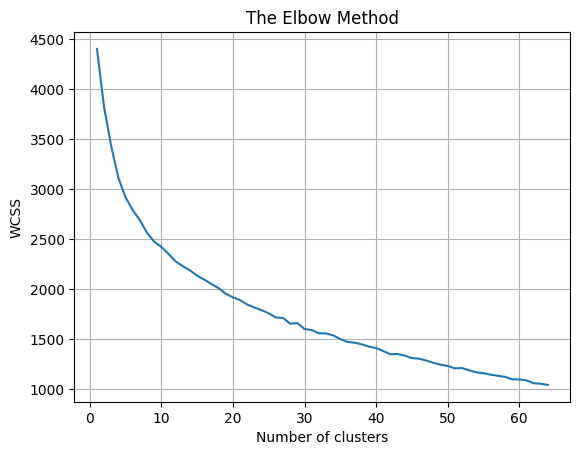

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
max_clusters = 64
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, max_clusters+1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

max_clusters = 64
silhouette_scores = []

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

best_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
best_clusters


62

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Build the model
kmeans = KMeans(n_clusters=62, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Get cluster labels
cluster_labels = kmeans.labels_

cluster_labels

Silhouette Score: 0.1877192114297374


array([54,  9, 22, 35, 18, 28, 10, 28, 17,  8, 25, 47, 23, 56, 25, 59, 49,
       36, 48, 23, 40,  9, 17, 32,  0, 20, 36,  1, 28, 19, 32, 40, 11, 32,
       36, 36, 28, 40, 32, 28, 54, 45, 27, 34, 48, 43, 12, 39, 10, 19,  5,
       23, 34, 37, 14,  1, 43, 17, 58, 23, 18, 12,  3, 48, 13,  5, 42,  5,
        9, 56, 53, 28, 36, 37, 28, 14, 31, 23,  7, 37, 37, 49, 22,  9, 37,
        1, 11, 28,  5, 40,  5, 28, 39, 54, 18, 10, 14, 40, 32, 15, 14, 54,
       28, 42,  1, 31, 45, 17, 57, 56, 49, 37, 49, 18,  4,  3, 54, 36, 12,
        9, 39, 59,  4, 41, 11, 14, 15, 35,  0, 50,  0, 55,  9, 40, 11, 12,
       43, 34, 23, 39,  0, 52,  8,  9, 25, 59,  9, 11, 19, 59, 18, 18, 43,
       36, 11, 58,  8, 23, 19, 47, 58, 22,  1, 23,  7, 48, 55, 20, 18, 44,
       52, 22,  0, 61, 30,  4, 22,  6, 34, 38, 40,  5, 57, 31, 25, 34, 18,
       38, 22, 60, 15, 37, 57, 11, 47, 30, 56, 34, 20, 53, 27, 22, 14, 43,
        8, 44, 11, 58,  2, 60, 37,  8, 48, 36,  3,  7, 29, 47, 24, 45, 45,
       34,  3, 29,  5, 42

In [37]:
from collections import Counter

# Get counts for each cluster label
cluster_counts = Counter(clusters)

# Print the counts
print(f"Number of data points in each cluster:")
print(cluster_counts)

# (Optional) Print percentages
print(f"Percentage of data points in each cluster:")
for cluster, count in cluster_counts.items():
    percentage = count / len(df_scaled) * 100
    print(f"Cluster {cluster}: {percentage:.2f}%")

Number of data points in each cluster:
Counter({4: 12, 44: 11, 18: 10, 28: 10, 20: 10, 24: 10, 9: 9, 36: 9, 11: 9, 5: 9, 37: 9, 3: 9, 23: 8, 34: 8, 14: 8, 13: 8, 53: 8, 7: 8, 57: 8, 22: 7, 47: 7, 40: 7, 45: 7, 21: 7, 26: 7, 16: 7, 8: 6, 0: 6, 19: 6, 27: 6, 43: 6, 12: 6, 42: 6, 50: 6, 6: 6, 38: 6, 54: 5, 10: 5, 25: 5, 56: 5, 59: 5, 48: 5, 32: 5, 1: 5, 39: 5, 58: 5, 31: 5, 52: 5, 2: 5, 29: 5, 33: 5, 46: 5, 51: 5, 17: 4, 49: 4, 15: 4, 41: 4, 55: 4, 30: 4, 35: 3, 61: 3, 60: 3})
Percentage of data points in each cluster:
Cluster 54: 1.25%
Cluster 9: 2.25%
Cluster 22: 1.75%
Cluster 35: 0.75%
Cluster 18: 2.50%
Cluster 28: 2.50%
Cluster 10: 1.25%
Cluster 17: 1.00%
Cluster 8: 1.50%
Cluster 25: 1.25%
Cluster 47: 1.75%
Cluster 23: 2.00%
Cluster 56: 1.25%
Cluster 59: 1.25%
Cluster 49: 1.00%
Cluster 36: 2.25%
Cluster 48: 1.25%
Cluster 40: 1.75%
Cluster 32: 1.25%
Cluster 0: 1.50%
Cluster 20: 2.50%
Cluster 1: 1.25%
Cluster 19: 1.50%
Cluster 11: 2.25%
Cluster 45: 1.75%
Cluster 27: 1.50%
Cluster 34: 2.

In [38]:
cluster_2_indices = np.where(clusters == 0)[0]
cluster_2_data = df1.iloc[cluster_2_indices]
cluster_2_data

,ID,Gender,Height (cm),Age,Weight (kg),BMI,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension
24,0.060150,1,168,22,74,26.562733,0,1,1,0,0
128,0.320802,1,164,30,66,24.707321,1,1,1,0,0
130,0.325815,1,158,28,53,21.429630,0,1,1,0,0
140,0.350877,1,176,28,68,22.018770,1,1,1,0,0
172,0.431078,1,163,33,62,23.619520,1,1,1,0,0
301,0.754386,1,158,24,62,25.049356,0,1,1,0,0


In [42]:
df3=df1.copy()
# Get cluster labels
cluster_labels = kmeans.labels_

df3['Cluster']=cluster_labels
df3

,ID,Gender,Height (cm),Age,Weight (kg),BMI,Knee Pain,Back Pain,Diabetes,Heart Disease,Hypertension,Cluster
0,0.000000,0,157,24,56,22.857097,0,1,0,0,0,54
1,0.002506,1,193,50,99,26.632088,0,1,0,0,0,9
2,0.005013,1,199,45,117,29.749211,0,1,1,0,0,22
3,0.007519,1,150,49,43,19.528223,0,1,1,0,0,35
4,0.010025,0,178,51,86,27.382191,1,1,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.989975,1,162,46,53,20.382519,0,0,0,0,1,37
396,0.992481,1,158,20,72,28.966427,0,0,0,0,0,51
397,0.994987,1,172,52,58,19.751178,1,0,1,0,0,59
398,0.997494,0,176,53,82,26.662217,1,0,0,0,1,4


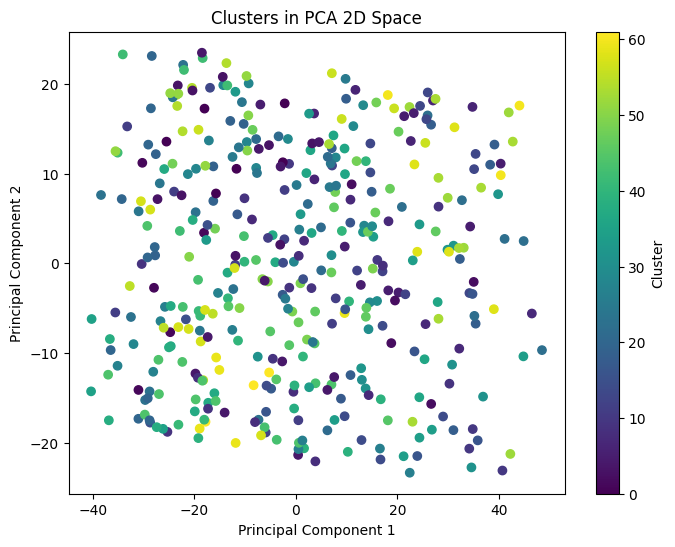

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df3.drop('Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['Cluster'] = df3['Cluster']

# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Cluster'])
plt.title('Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()